# 📺Netflix :: 🥤Visualization, 🎬Recommendation, 🍟EDA

## Netflix is one of the most famous streaming platform and that keeps growing bigger and faster with its popularity, showa and quality content. This notebook is all about an EDA or stroy telling through its data along with a content-based recommendation system and a wide range of different graphs and visuals.

Importing all essentials

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Laoding the dataset

In [106]:
netflix = pd.read_csv('netflix_titles/netflix_titles.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Let's check the shape of the dataset

In [107]:
netflix.shape

(8807, 12)

In [108]:
netflix.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

- Let's check **SHOW vs MOVIES**

In [109]:
netflix_shows = netflix[netflix['type']=='TV Shows']

In [110]:
netflix_movies = netflix[netflix['type']=='Movie']

### Time for visulization

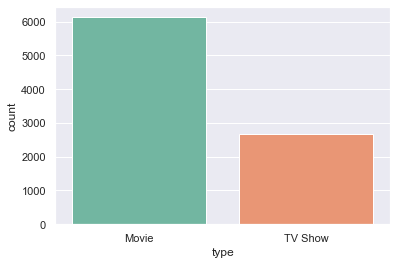

In [111]:
sns.set(style='darkgrid')
ax = sns.countplot(x='type', data=netflix, palette='Set2')

It is an evident that there are more Movies on Netflix than TV shows

## Movie ratings Analysis

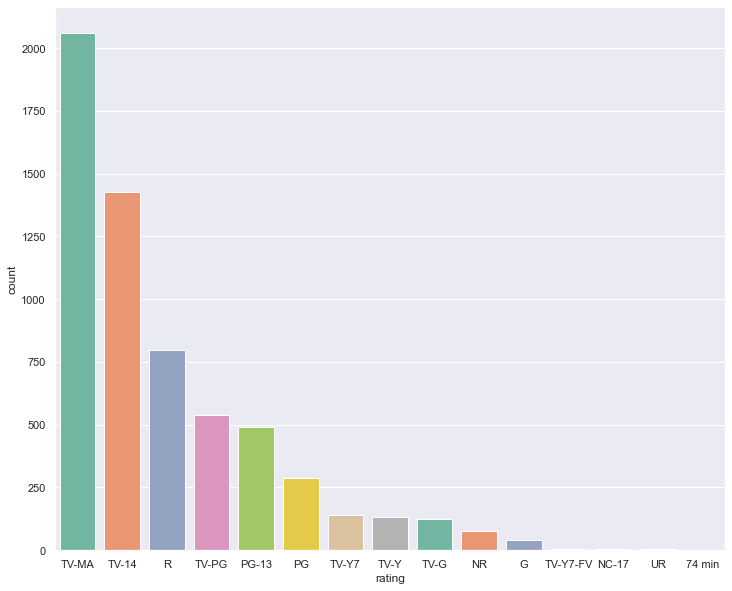

In [112]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_movies, palette="Set2", order=netflix_movies['rating'].value_counts().index[0:15])

- The largest count of movies are made with the 'TV-MA' rating."TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only.

- Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.

- Third largest is the very popular 'R' rating.An R-rated film is a film that has been assessed as having material which may be unsuitable for children under the age of 17

# Analysing IMDB ratings to get top raed movies on Netflix

In [113]:
imdb_ratings=pd.read_csv('IMDb ratings/IMDb ratings.csv',usecols=['weighted_average_vote'])
imdb_titles=pd.read_csv('IMDb movies/IMDb movies.csv', usecols=['title','year','genre'])

In [114]:
imdb_ratings.head()

,weighted_average_vote
0,5.9
1,6.1
2,5.8
3,5.2
4,7.0


In [115]:
imdb_titles.head()

,title,year,genre
0,Miss Jerry,1894,Romance
1,The Story of the Kelly Gang,1906,"Biography, Crime, Drama"
2,Den sorte drøm,1911,Drama
3,Cleopatra,1912,"Drama, History"
4,L'Inferno,1911,"Adventure, Drama, Fantasy"


In [116]:
ratings = pd.DataFrame({'Title':imdb_titles.title,
                       'Release Year':imdb_titles.year,
                       'Rating':imdb_ratings.weighted_average_vote,
                       'Genre':imdb_titles.genre})
ratings.drop_duplicates(subset=['Title', 'Release Year', 'Rating'],inplace=True)
ratings.shape

(85852, 4)

Performing inner join on the ratings dataset and netflix dataset to get the content that has both ratings on IMDB and are available on Netflix.

In [117]:
ratings.dropna()
joint_data = ratings.merge(netflix, left_on='Title', right_on='title', how='inner')
joint_data = joint_data.sort_values(by='Rating', ascending=False)

In [118]:
import plotly.express as px
top_rated = joint_data[0:10]
fig = px.sunburst(
top_rated,path=['title', 'country'],values='Rating', color='Rating')
fig.show()

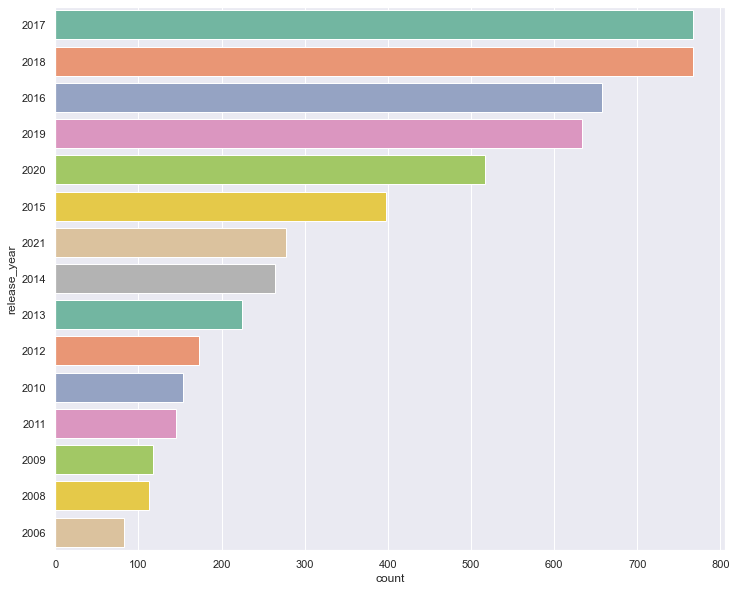

In [119]:
plt.figure(figsize=(12,10))
sns.set(style='darkgrid')
ax = sns.countplot(y='release_year', data=netflix_movies, palette='Set2', order=netflix_movies['release_year'].value_counts().index[0:15])

2017 & 2018 were the yeasr when most of the movies were released

In [120]:
countries={}
netflix_movies['country']=netflix_movies['country'].fillna('Unknown')
cou=list(netflix_movies['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1

In [121]:
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no
        
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}

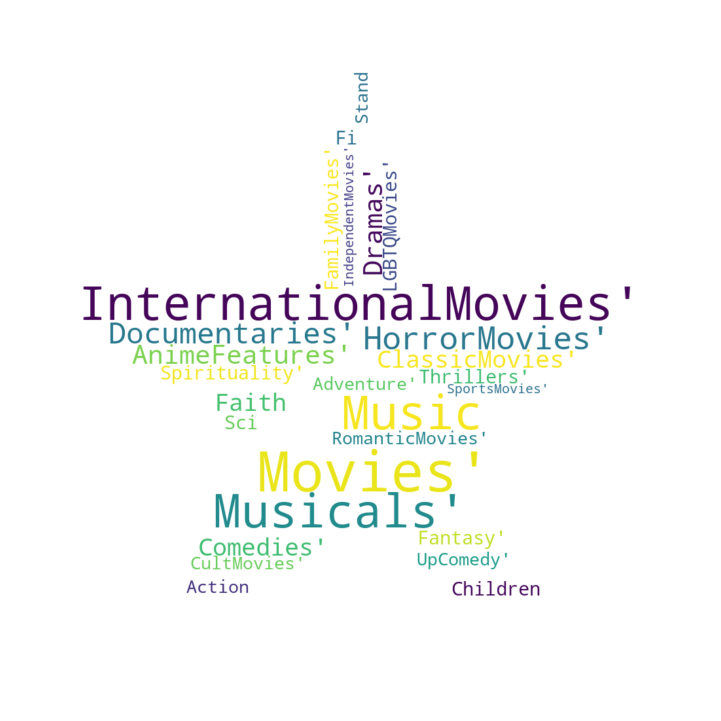

In [122]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

text = list(set(gen))
plt.rcParams['figure.figsize'] = (13, 13)

#assigning shape to the word cloud
mask = np.array(Image.open('star.png'))
wordcloud = WordCloud(max_words=1000000,background_color="white",mask=mask).generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

## TOP 10 MOVIE CONTENT CREATING COUNTRIES

[Text(0, 0, 'UnitedStates'),
 Text(1, 0, 'France'),
 Text(2, 0, 'UnitedKingdom'),
 Text(3, 0, 'Canada'),
 Text(4, 0, 'Germany'),
 Text(5, 0, 'Belgium'),
 Text(6, 0, 'China'),
 Text(7, 0, 'Spain'),
 Text(8, 0, 'Japan'),
 Text(9, 0, 'India')]

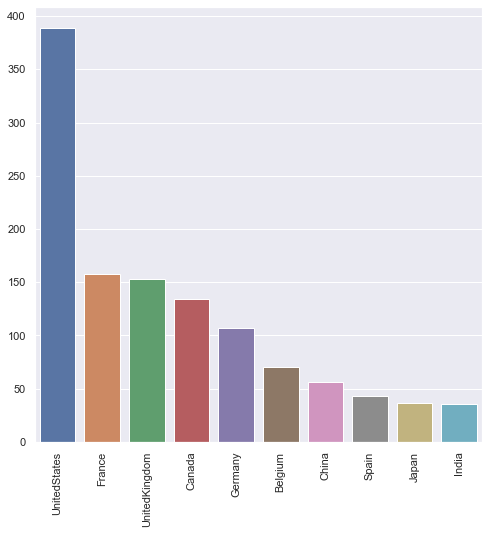

In [123]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 90)

# Analyze duration of movies

In [124]:
netflix_movies['duration'].isnull().sum()

3

In [125]:
netflix_movies['duration']=netflix_movies['duration'].str.replace(' min','')

In [126]:
netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(float)

In [127]:
netflix_movies['duration']

0        90.0
6        91.0
7       125.0
9       104.0
12      127.0
        ...  
8801     96.0
8802    158.0
8804     88.0
8805     88.0
8806    111.0
Name: duration, Length: 6131, dtype: float64

## Plotting the duration of Movies

<AxesSubplot:xlabel='duration', ylabel='Density'>

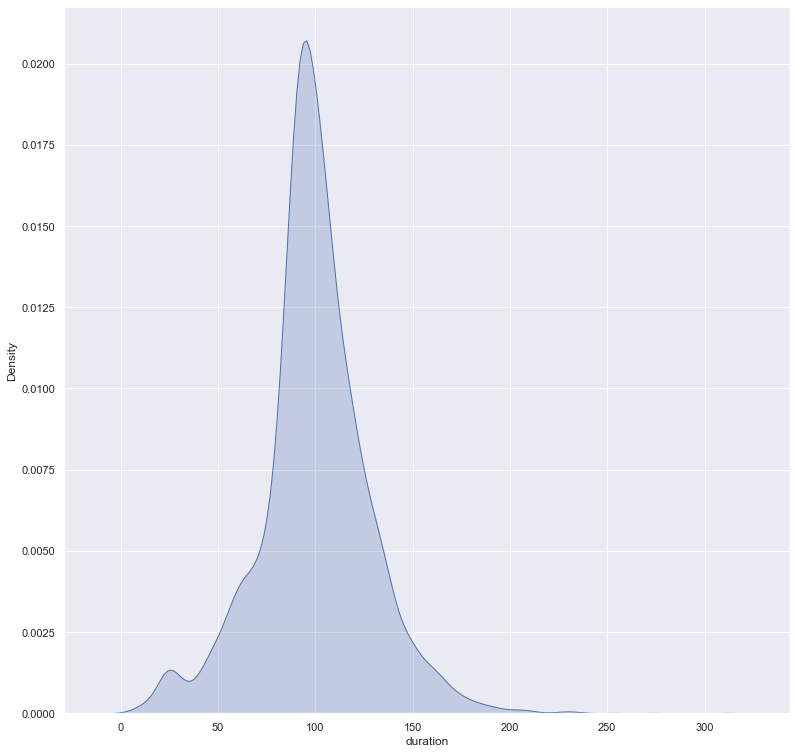

In [128]:
sns.set(style='darkgrid')
sns.kdeplot(netflix_movies['duration'], shade=True)

So, a good amount of movies on Netflix are among the duration of 75-120 mins. It is acceptable considering the fact that a fair amount of the audience cannot watch a 3 hour movie in one sitting. 

In [129]:
from collections import Counter

genres = list(netflix_movies['listed_in'])
gen=[]

for i in genres:
    i = list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
        
g = Counter(gen)

# WorldCloud for Genres

# Lollipop of genres vs their count on Netflix

Text(0.5, 1.0, 'Genres')

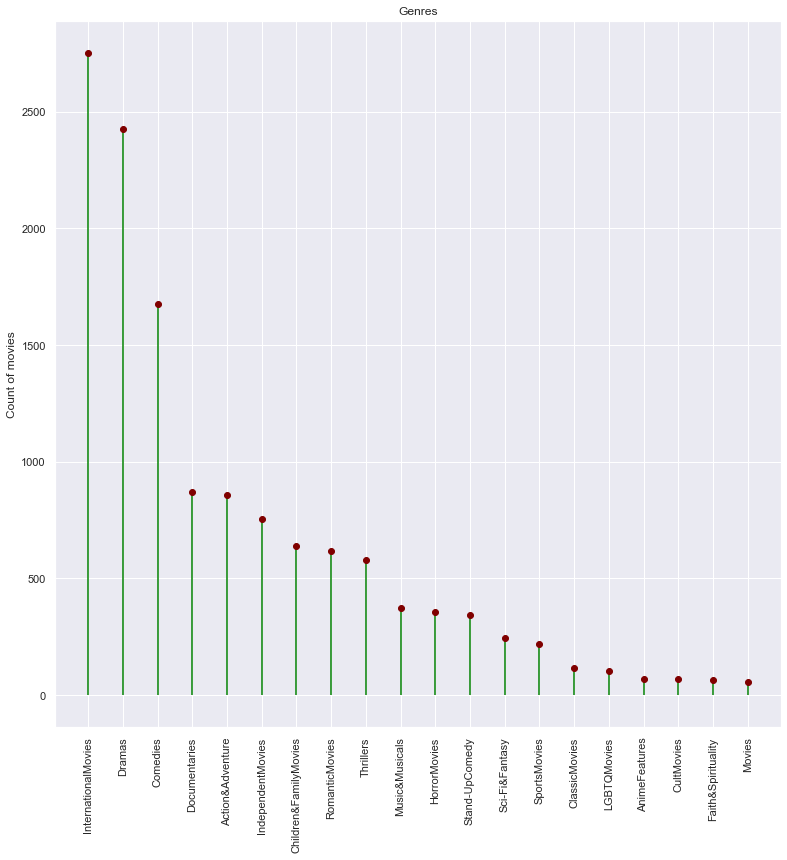

<Figure size 1008x720 with 0 Axes>

In [130]:
g={k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}


fig, ax = plt.subplots()

fig = plt.figure(figsize = (14, 10))
x=list(g.keys())
y=list(g.values())
ax.vlines(x, ymin=0, ymax=y, color='green')
ax.plot(x,y, "o", color='maroon')
ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel("Count of movies")
# set a title
ax.set_title("Genres")

Therefore, it is clear that international movies, dramas and comedies are the top three genres that have the highest amount of content on Netflix.



# Recommendation System 

The TF-IDF(Term Frequency-Inverse Document Frequency (TF-IDF) ) score is the frequency of a word occurring in a document, down-weighted by the number of documents in which it occurs. This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

In [131]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [132]:
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
netflix['description'] = netflix['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming
# the data
tfidf_matrix = tfidf.fit_transform(netflix['description'])

#O/p the shape of tfidf_matrix
tfidf_matrix.shape

(8807, 18895)

In [133]:
#Linear Kernel
from sklearn.metrics.pairwise import linear_kernel

#Cosine similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [134]:
indices = pd.Series(netflix.index, index = netflix['title']).drop_duplicates()

In [135]:
indices

title
Dick Johnson Is Dead        0
Blood & Water               1
Ganglands                   2
Jailbirds New Orleans       3
Kota Factory                4
                         ... 
Zodiac                   8802
Zombie Dumb              8803
Zombieland               8804
Zoom                     8805
Zubaan                   8806
Length: 8807, dtype: int64

In [136]:
def get_recommendation(title, cosine_sim=cosine_sim):
    idx = indices[title]
    
    #Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    #Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse=True)
    
    #Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    
    #Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    #return the top 10 similar movies
    return netflix['title'].iloc[movie_indices]

### Recommendation of **Peaky Blinders**

In [137]:
get_recommendation('Peaky Blinders')

7683                    Our Godfather
2646                   My Stupid Boss
3133                              Don
8293                         The Fear
7140    Jonathan Strange & Mr Norrell
7785                Power Rangers Zeo
8467                       The Prison
8539                       The Tudors
1510                    The Con Is On
8391     The Legend of Michael Mishra
Name: title, dtype: object

## Recommendation of **Friends**

In [138]:
get_recommendation('Friends')

7397        Manhattan Romance
3369          BoJack Horseman
964       Things Heard & Seen
5090                 Episodes
4096                Studio 54
6549               Dad's Army
4964        Trailer Park Boys
4265     Single Ladies Senior
682     Why Are You Like This
2403                   Menahi
Name: title, dtype: object

## Recommendation of **Narcos**

In [139]:
get_recommendation('Narcos')

7463                          Miss Dynamite
6673                            El Cartel 2
2921                         Narcos: Mexico
4750                               El Chapo
310     Cocaine Cowboys: The Kings of Miami
1268                   El final del paraíso
5822                                Cocaine
3425                            Street Flow
4456                         Raja Natwarlal
2                                 Ganglands
Name: title, dtype: object

## It is seen that the model performs well, but is not very accurate.Therefore, more metrics are added to the model to improve performance.

# Content based filtering on multiple metrics

Filtering on the following factors:
- Title
- Cast
- Director
- Listed in
- Plot

Filling null values with empty string

In [140]:
filledna=netflix.fillna('')
filledna.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,,,,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Cleaning the data, making all the words lower case

In [141]:
def clean_data(x):
    return str.lower(x.replace(" ",""))

In [142]:
#Features on which the model is to be filtered
features=['title', 'director', 'cast', 'listed_in', 'description']
filledna=filledna[features]

In [143]:
for feature in features:
    filledna[feature] = filledna[feature].apply(clean_data)
    
filledna.head()

,title,director,cast,listed_in,description
0,dickjohnsonisdead,kirstenjohnson,,documentaries,"asherfathernearstheendofhislife,filmmakerkirst..."
1,blood&water,,"amaqamata,khosingema,gailmabalane,thabangmolab...","internationaltvshows,tvdramas,tvmysteries","aftercrossingpathsataparty,acapetownteensetsou..."
2,ganglands,julienleclercq,"samibouajila,tracygotoas,samueljouy,nabihaakka...","crimetvshows,internationaltvshows,tvaction&adv...","toprotecthisfamilyfromapowerfuldruglord,skille..."
3,jailbirdsneworleans,,,"docuseries,realitytv","feuds,flirtationsandtoilettalkgodownamongthein..."
4,kotafactory,,"mayurmore,jitendrakumar,ranjanraj,alamkhan,ahs...","internationaltvshows,romantictvshows,tvcomedies",inacityofcoachingcentersknowntotrainindia’sfin...


Creating a "soup" or a "bag of words" of all rows

In [144]:
def create_soup(x):
    return x['title']+ ' '+ x['director']+ ' '+ x['cast']+ ' ' + x['listed_in']+ ' ' +x['description']

In [145]:
filledna['soup'] = filledna.apply(create_soup, axis=1)

From here on, the code is basically similar to the upper model except the fact that count vectorizer is used instead of tfidf

In [146]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [147]:
filledna = filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['title'])

In [148]:
def get_recommendation_new(title, cosine_sim=cosine_sim):
    title = title.replace(' ', '').lower()
    idx = indices[title]
    
    #Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    #Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse=True)
    
    #Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    
    #Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    #return the top 10 similar movies
    return netflix['title'].iloc[movie_indices]

## Recommendation of **3 Idiots**

In [149]:
get_recommendation_new('3 Idiots', cosine_sim2)

4660                              PK
8695               War Chhod Na Yaar
8391    The Legend of Michael Mishra
4732                 Rang De Basanti
2766                           Maska
3147                         Talaash
6907                          Haapus
1022                Taare Zameen Par
1115              Ferrari Ki Sawaari
4507                           Sanju
Name: title, dtype: object

In [150]:
get_recommendation_new('Friends', cosine_sim2)

5090                               Episodes
6795                                Frasier
8189                 The Andy Griffith Show
6549                             Dad's Army
7721                    Pee-wee's Playhouse
8599                        Toast of London
6456                                 Cheers
8541    The Twilight Zone (Original Series)
1929                        Man with a Plan
1480                             Still Game
Name: title, dtype: object

Okay so our new recommendation model is performing better than previous one

In [151]:
get_recommendation_new('Narcos', cosine_sim2)

2921            Narcos: Mexico
2415        Queen of the South
4655        Marvel's Iron Fist
3725                   Shooter
7729        Person of Interest
3752    Marvel's Jessica Jones
4752                   Smoking
2874            Altered Carbon
3298             Wild District
5046                     Valor
Name: title, dtype: object

# How many Netflix shows/movies are inspired from books are their storylines?

In [152]:
books = pd.read_csv('books/books.csv')
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [153]:
books['original_title']

0                                        The Hunger Games
1                Harry Potter and the Philosopher's Stone
2                                                Twilight
3                                   To Kill a Mockingbird
4                                        The Great Gatsby
                              ...                        
9995                                           Bayou Moon
9996                                     Means of Ascent 
9997                                The Mauritius Command
9998    Cinderella Ate My Daughter: Dispatches from th...
9999                                  The First World War
Name: original_title, Length: 10000, dtype: object

In [154]:
books['original_title'] = books['original_title'].str.lower()
x = netflix
x['title'] = x['title'].str.lower()
netflix_books = x.merge(books, left_on='title', right_on='original_title', how='inner')

In [155]:
netflix_books.shape

(339, 35)

In [156]:
import plotly.graph_objects as go
labels = ['Shows from books', 'Shows not from books']
values = [248, 6234]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

So from above piechart we can clearly see that nearly 4% shows on Netlix are inspired by books.

# Great Job, we are done with this task🍟